In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Hyper-parameters:

RANDOM_STATE = 32
TEST_SIZE = 0.2
EPOCHS = 10
ALPHA = 0.001
NOISE = 0.2

np.random.seed(RANDOM_STATE)

In [3]:
# Parameters for matplotlib:

params = {'legend.fontsize' : 'medium',
          'figure.figsize': (15,8),
          'axes.labelsize' : 'medium',
          'axes.titlesize': 'medium',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium'
}

CMAP = 'bwr' 
plt.rcParams.update(params)

In [16]:
# Helper function:


def fn_plot_hist(hist_df):
    
    # Instantiate plt object with 1 row two columns
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) 

    # Propertiesfor matplotlib.patch.Patch 
    props = dict(boxstyle='round', 
                 facecolor='aqua', 
                 alpha=0.4)

    ax = axes[0]

    # plot loss columns of the dataframe
    hist_df.plot(y = ['loss','val_loss'], ax = ax, colormap=CMAP)

    # Mark min loss and min val_loss
    lossmin = hist_df['loss'].min()
    testmin = hist_df['val_loss'].min()

    # Little beautification
    txtstr = "Min Loss: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(lossmin,
                                                                            testmin) #text to plot

    # Place a text box in upper left in axis coords
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # set labels on the axes
    ax.set_xlabel("Epochs")

    ax.set_ylabel("Loss")

    # show grid
    ax.grid();

    # for second figure
    ax = axes[1]

    # plot accuracy and val_accuracy
    hist_df.plot( y = ['accuracy', 'val_accuracy'], ax = ax, colormap=CMAP)
    

    # get max accuracies
    accmax = hist_df['accuracy'].max()
    testmax = hist_df['val_accuracy'].max()
    
    # Little beautification
    txtstr = "Max Accuracy: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(accmax,
                                                                                testmax) #text to plot

    # place a text box in upper left in axis coords
    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark labels
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    
    # Show grid
    ax.grid();
    
    # Organise subplot params so that the subplots fit in to the figure area
    plt.tight_layout()

In [5]:
# import the dataset:

df = pd.read_csv('wine.data.csv')
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Define the X and y:

y = df['Class'].to_numpy()
X = df.drop('Class', axis = 1).to_numpy()

In [7]:
# split the dataset:

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify= y,
                                                   test_size = TEST_SIZE,
                                                   random_state= RANDOM_STATE)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [8]:
# Scandardscaler on X:

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# labelencoder on y:

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [9]:
# initialize the kernel :

krnl_init = tf.keras.initializers.GlorotUniform(seed= RANDOM_STATE)


In [10]:
# Define the sequencial model:

model = tf.keras.Sequential([
    
    # input layer:
    tf.keras.layers.Dense(8, activation='tanh', kernel_initializer=krnl_init),
    
    # output layer:
    tf.keras.layers.Dense(3, kernel_initializer=krnl_init)

])


In [11]:
# define loss function:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)


In [12]:
#compile the model:

model.compile(optimizer = 'Adam',
             loss = loss_fn,
             metrics = ['accuracy'])

In [14]:
# fit the model:

hist = model.fit(X_train, y_train, 
                  validation_data = [X_test, y_test],
                  epochs = EPOCHS,
                  verbose = 2)


Epoch 1/10
5/5 - 1s - 189ms/step - accuracy: 0.7746 - loss: 0.7498 - val_accuracy: 0.7778 - val_loss: 0.7604
Epoch 2/10
5/5 - 0s - 18ms/step - accuracy: 0.7817 - loss: 0.7205 - val_accuracy: 0.8056 - val_loss: 0.7331
Epoch 3/10
5/5 - 0s - 34ms/step - accuracy: 0.8169 - loss: 0.6922 - val_accuracy: 0.8333 - val_loss: 0.7072
Epoch 4/10
5/5 - 0s - 40ms/step - accuracy: 0.8380 - loss: 0.6651 - val_accuracy: 0.8333 - val_loss: 0.6823
Epoch 5/10
5/5 - 0s - 38ms/step - accuracy: 0.8451 - loss: 0.6401 - val_accuracy: 0.8333 - val_loss: 0.6587
Epoch 6/10
5/5 - 0s - 44ms/step - accuracy: 0.8873 - loss: 0.6156 - val_accuracy: 0.8333 - val_loss: 0.6364
Epoch 7/10
5/5 - 0s - 44ms/step - accuracy: 0.9085 - loss: 0.5932 - val_accuracy: 0.8333 - val_loss: 0.6151
Epoch 8/10
5/5 - 0s - 43ms/step - accuracy: 0.9155 - loss: 0.5718 - val_accuracy: 0.8333 - val_loss: 0.5946
Epoch 9/10
5/5 - 0s - 47ms/step - accuracy: 0.9225 - loss: 0.5508 - val_accuracy: 0.8333 - val_loss: 0.5758
Epoch 10/10
5/5 - 0s - 43ms

In [21]:
y_pred = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [22]:
# find hishest y_pred position:

y_pred.argmax(axis = 1)

array([1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0], dtype=int64)

In [23]:
# find accuracy score:

accuracy_score(y_test, y_pred.argmax(axis = 1))

0.8333333333333334

In [24]:
# classification report:

print(classification_report(y_test, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.72      0.93      0.81        14
           2       0.86      0.60      0.71        10

    accuracy                           0.83        36
   macro avg       0.86      0.82      0.82        36
weighted avg       0.85      0.83      0.83        36



In [25]:
# confustion matrix:

print(confusion_matrix(y_test, y_pred.argmax(axis = 1)))

[[11  1  0]
 [ 0 13  1]
 [ 0  4  6]]


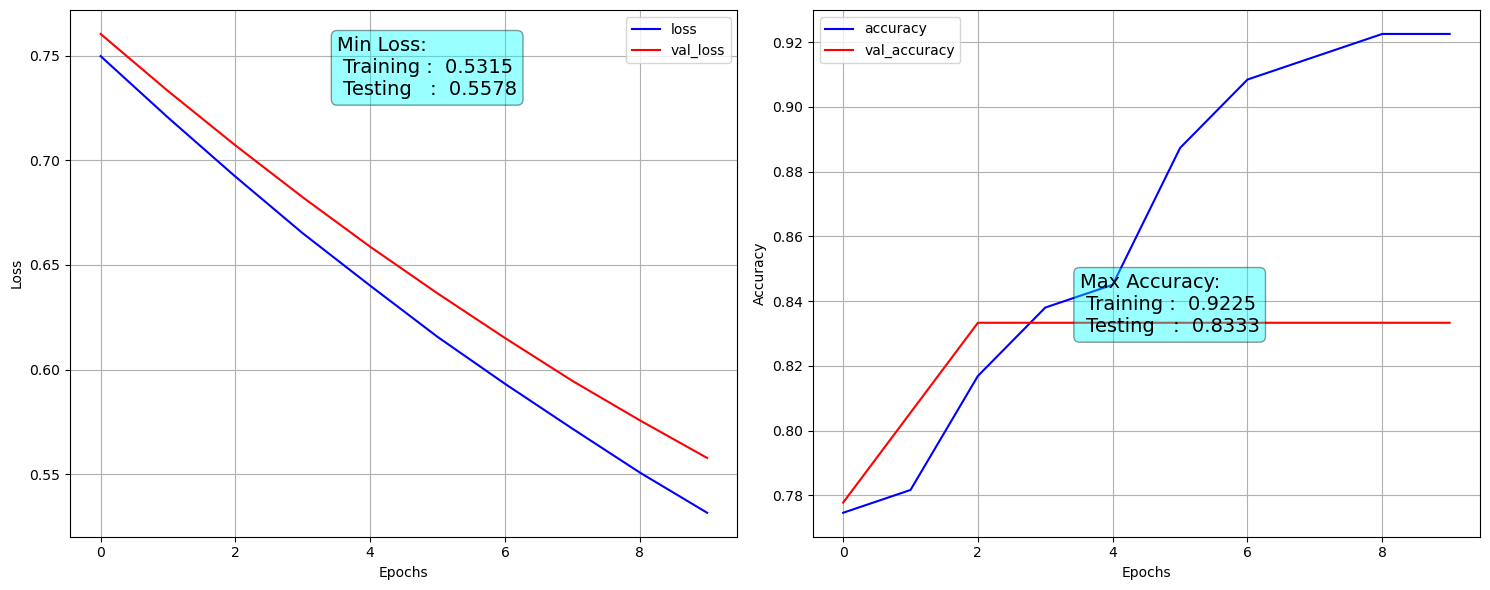

In [26]:
# plot the loss curve:

res = pd.DataFrame(hist.history)
fn_plot_hist(res)